In [1]:
# import necessary libraries
import pandas as pd
import statsmodels.api as sm  
from sklearn.model_selection import train_test_split  
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score  
import matplotlib.pyplot as plt  

In [2]:
# 1.

# load the dataset into a pandas DataFrame
df = pd.read_csv('Social_Network_Ads.csv', index_col='User ID')

# print the first five entries from the DataFrame
print(df.head())

          Gender  Age  EstimatedSalary  Purchased
User ID                                          
15624510    Male   19            19000          0
15810944    Male   35            20000          0
15668575  Female   26            43000          0
15603246  Female   27            57000          0
15804002    Male   19            76000          0


In [3]:
# 2.

# convert categorical 'Gender' variable into numeric values ensuring compatibility
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

# define the independent (feature) variables
X = df[['Gender', 'Age', 'EstimatedSalary']]

# define the dependent (target) variable
y = df['Purchased']

In [4]:
# 3.

# split the data into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [5]:
# 4.

# train the logistic regression model
model = sm.Logit(y_train, sm.add_constant(X_train)).fit()

# print model summary to analyze
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.371980
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              Purchased   No. Observations:                  280
Model:                          Logit   Df Residuals:                      276
Method:                           MLE   Df Model:                            3
Date:                Wed, 05 Feb 2025   Pseudo R-squ.:                  0.4214
Time:                        13:50:11   Log-Likelihood:                -104.15
converged:                       True   LL-Null:                       -180.02
Covariance Type:            nonrobust   LLR p-value:                 1.120e-32
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -11.1778      1.378     -8.114      0.000     -13.878      -8.478
Gender        

In [6]:
# 5.

# make predictions for the test set
predictions = model.predict(sm.add_constant(X_test))

# convert prediction probabilities into binary class labels
bin_predictions = [1 if x >= 0.5 else 0 for x in predictions]

In [7]:
# 6.

# calculate and report the classification accuracy
accuracy = accuracy_score(y_test, bin_predictions)
print('Accuracy Score:', accuracy)

# generate and report the confusion matrix to understand prediction errors
con_matrix = confusion_matrix(y_test, bin_predictions)
print('Confusion Matrix:\n', con_matrix)

Accuracy Score: 0.8583333333333333
Confusion Matrix:
 [[71  2]
 [15 32]]


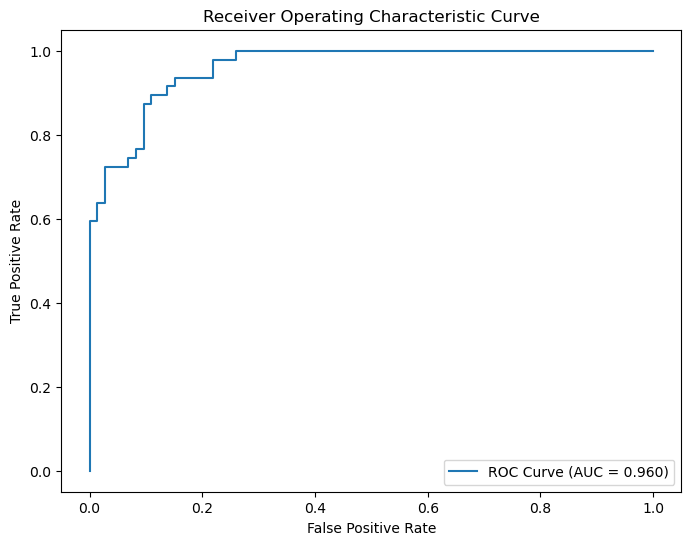

In [8]:
# 7.

# compute the ROC curve and corresponding AUC score to assess model performance
fpr, tpr, threshold = roc_curve(y_test, predictions)
roc_auc = roc_auc_score(y_test, predictions)

# plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.title('Receiver Operating Characteristic Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [9]:
# Results:
#
# Based on the Logistic Regression-Based Classifier built above, the model classification 
# accuracy comes out to approximately 85.8% with a high AUC score of 0.960.